In [32]:
from lightkurve import TessTargetPixelFile, search_targetpixelfile
import numpy as np
from astroquery.mast import Catalogs
from astroquery.mast import Tesscut
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.pyplot as plt

%matplotlib inline

In [33]:
tpf= TessTargetPixelFile('https://mast.stsci.edu/tesscut/api/v0.1/astrocut?ra=85.98751068&dec=9.27333736&y=20&x=20&units=px&sector=All')

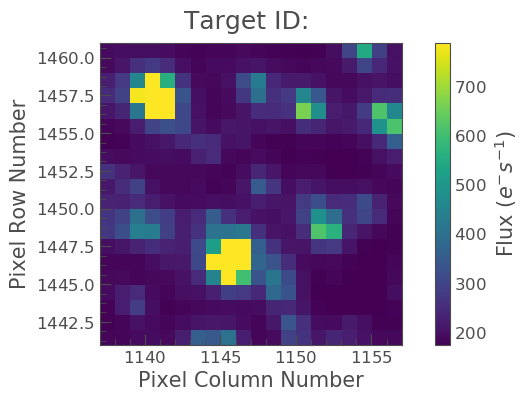

In [34]:
tpf.plot()

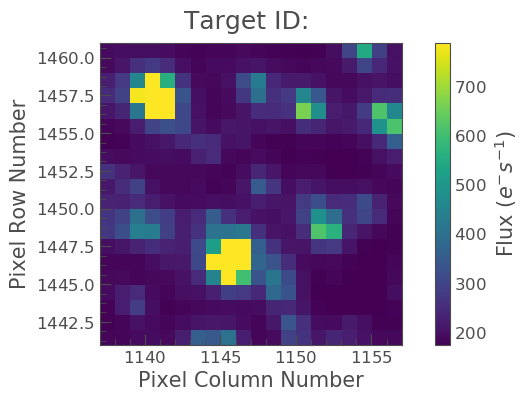

In [35]:
tpf.plot(aperture_mask=tpf.pipeline_mask)

In [36]:
tpf1= TessTargetPixelFile('https://mast.stsci.edu/tesscut/api/v0.1/astrocut?ra=85.98751068&dec=9.27333736&y=5&x=5&units=px&sector=All')

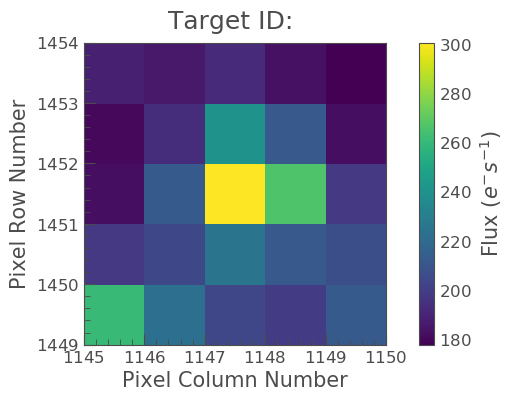

In [37]:
tpf1.plot()

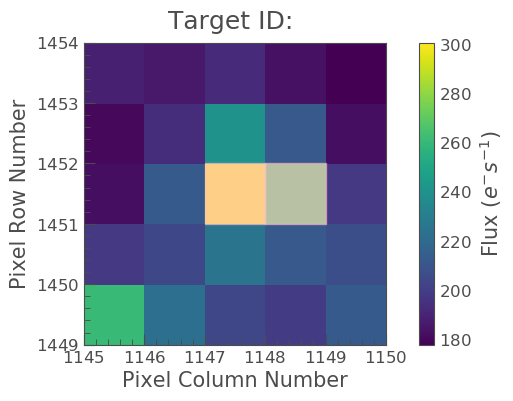

In [38]:
#This code is used to create a new aperture. Please note that this code is from Lightkurve Tutorials. 
import numpy as np
# Create a median image of the source over time
median_image = np.nanmedian(tpf1.flux, axis=0)
# Select pixels which are brighter than the 86th percentile of the median image
aperture_mask = median_image > np.nanpercentile(median_image, 93)
# Plot that aperture
tpf1.plot(aperture_mask=aperture_mask);

In [39]:
lc = tpf1.to_lightcurve(aperture_mask=aperture_mask)

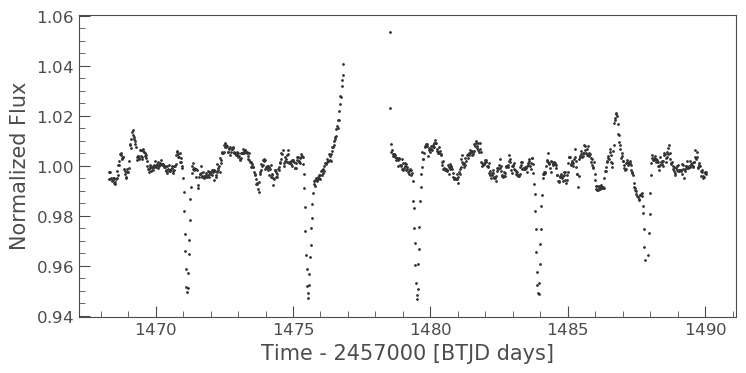

In [40]:
lc.remove_nans().remove_outliers(sigma=4).flatten(window_length=1477).scatter()

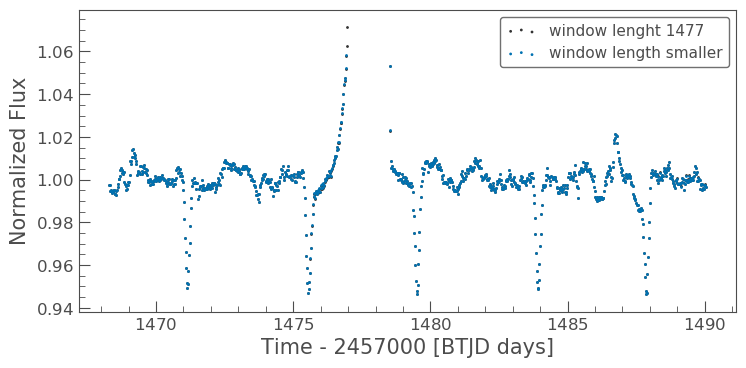

In [41]:
lc5 = lc.remove_nans().remove_outliers(sigma=7).flatten(window_length=1477)
lc55 = lc.remove_nans().remove_outliers(sigma=5).flatten(window_length=1455)
ax = lc5.scatter(label='window lenght 1477')
lc55.scatter(ax=ax, label='window length smaller');

In [42]:
pg = lc.to_periodogram(oversample_factor=1)

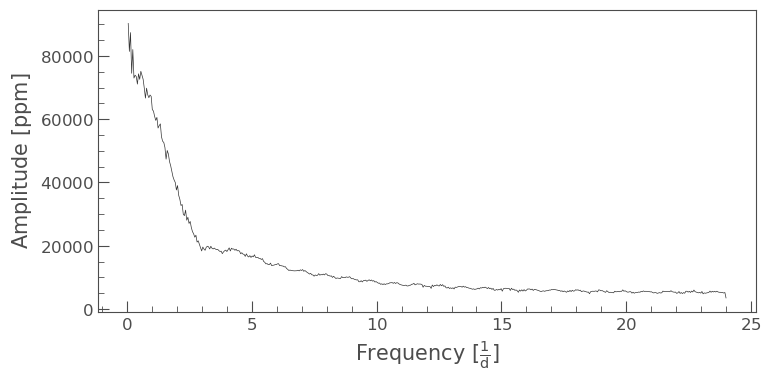

In [43]:
pg.plot()

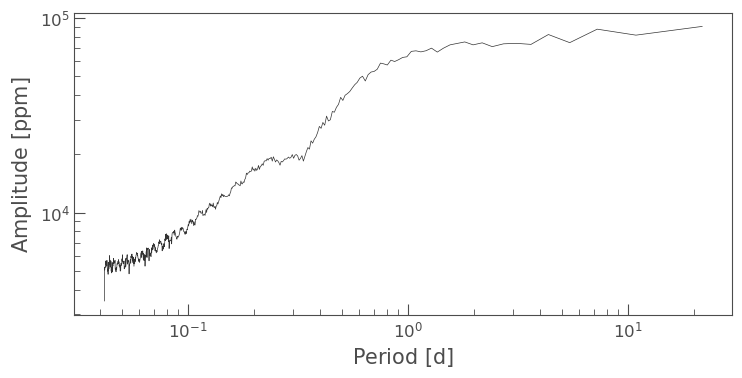

In [44]:
pg.plot(view='period',scale='log')

In [45]:
period=pg.period_at_max_power
print("Best Period: {}".format(period))

Best Period: 21.74969482421875 d


Text(0.5, 1.0, 'Phase Fold 8.4')

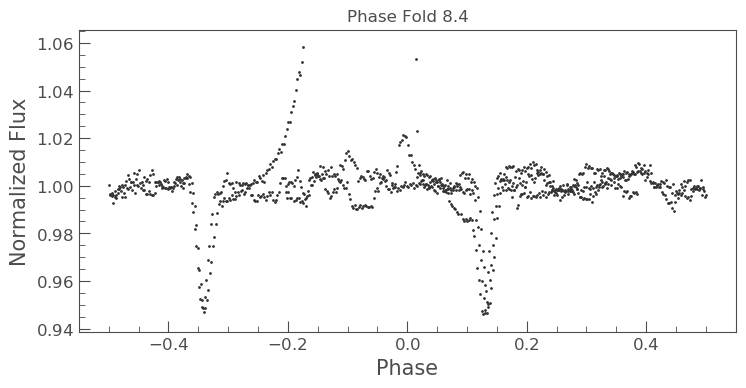

In [63]:
lc.remove_nans().remove_outliers(sigma=5).fold(8.4).flatten(window_length=1477).scatter()
plt.title("Phase Fold 8.4")

Text(0.5, 1.0, 'Phase Fold 8.2')

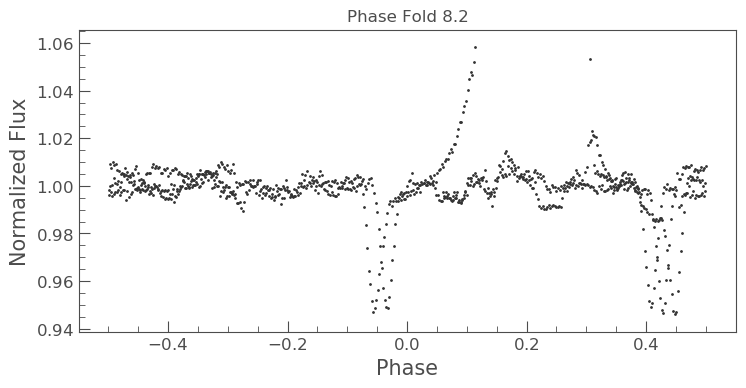

In [81]:
lc.remove_nans().remove_outliers(sigma=5).fold(8.2).flatten(window_length=1477).scatter()
plt.title("Phase Fold 8.2")

Text(0.5, 1.0, 'Phase Fold 4.2')

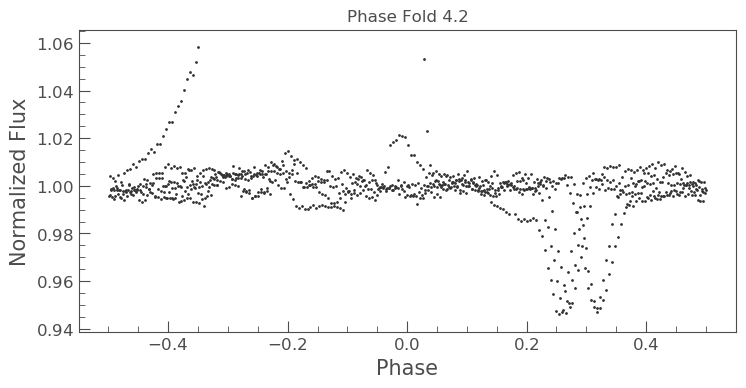

In [64]:
lc.remove_nans().remove_outliers(sigma=5).fold(4.2).flatten(window_length=1477).scatter()
plt.title("Phase Fold 4.2")

Text(0.5, 1.0, 'Phase Fold 4.4')

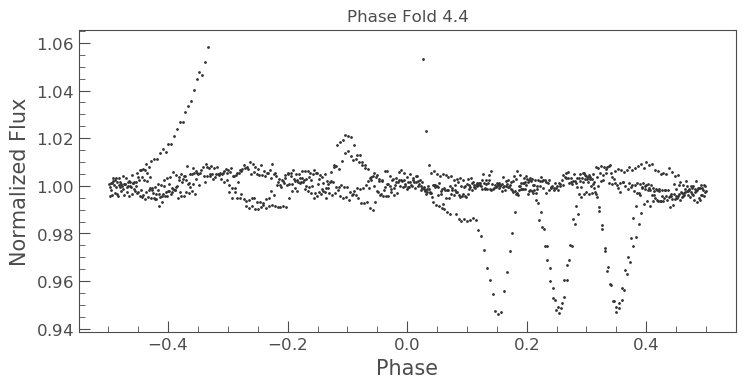

In [65]:
lc.remove_nans().remove_outliers(sigma=5).fold(4.4).flatten(window_length=1477).scatter()
plt.title("Phase Fold 4.4")

Text(0.5, 1.0, 'Phase Fold 4.0')

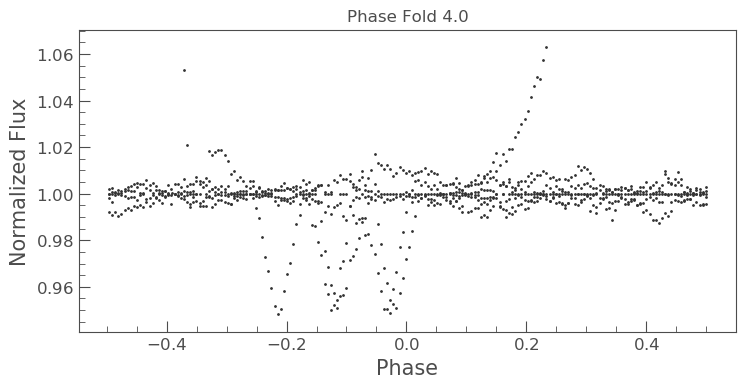

In [76]:
lc.remove_nans().remove_outliers(sigma=5).fold(4.0).flatten(window_length=1477).scatter()
plt.title("Phase Fold 4.0")

In [47]:
tpf2 = TessTargetPixelFile('https://mast.stsci.edu/tesscut/api/v0.1/astrocut?ra=85.9874950438995&dec=9.27339807523853&y=3&x=5&units=px&sector=6')

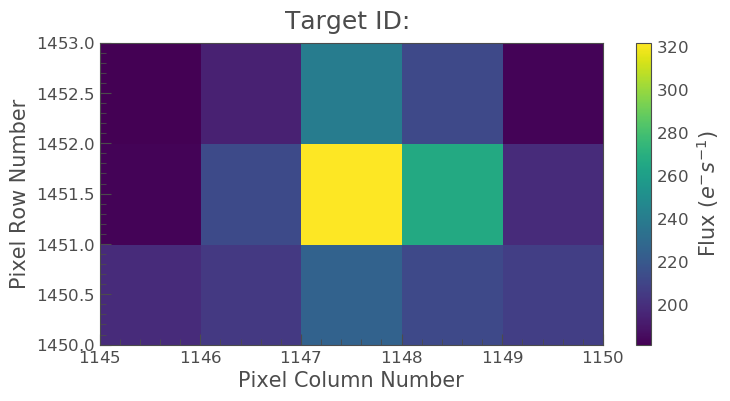

In [48]:
tpf2.plot()

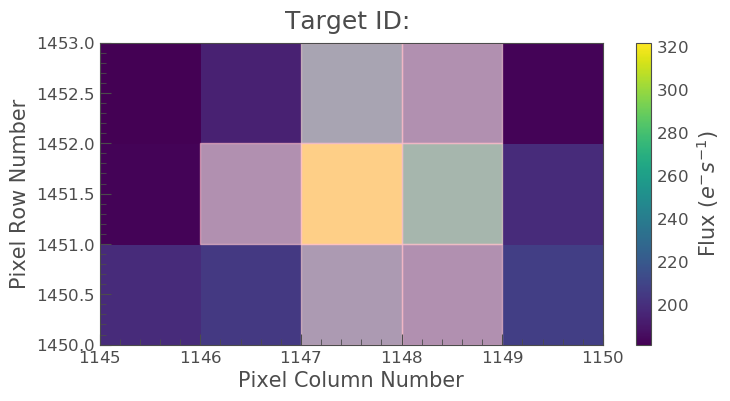

In [49]:
#This code is used to create a new aperture. Please note that this code is from Lightkurve Tutorials. 
import numpy as np
# Create a median image of the source over time
median_image = np.nanmedian(tpf2.flux, axis=0)
# Select pixels which are brighter than the 86th percentile of the median image
aperture_mask = median_image > np.nanpercentile(median_image, 50)
# Plot that aperture
tpf2.plot(aperture_mask=aperture_mask);

In [50]:
lc2=tpf2.to_lightcurve(aperture_mask=aperture_mask)

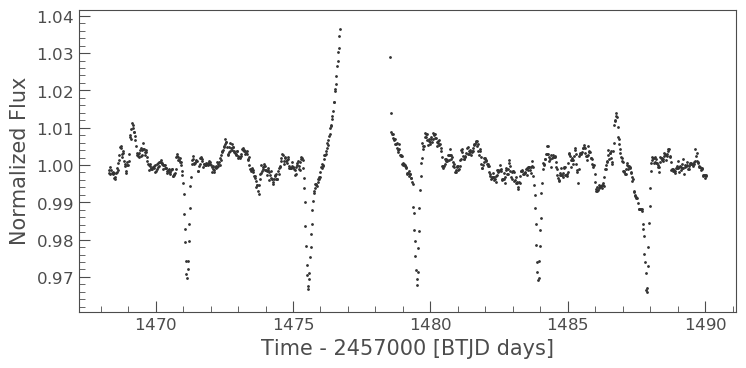

In [51]:
lc2.remove_nans().remove_outliers(sigma=4).flatten(window_length=1475).scatter()

In [52]:
pg2 = lc2.to_periodogram(oversample_factor=10)

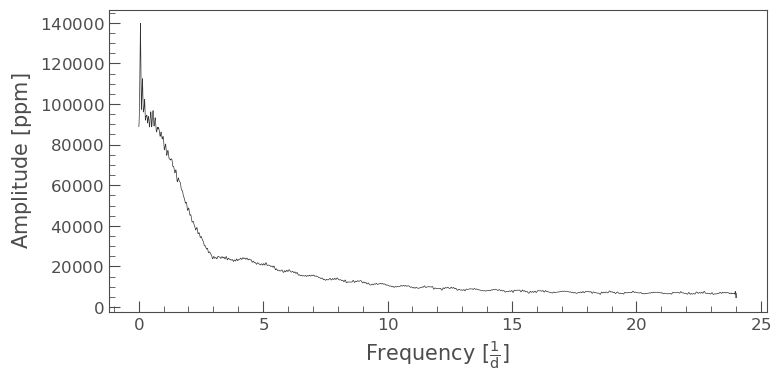

In [53]:
pg2.plot()

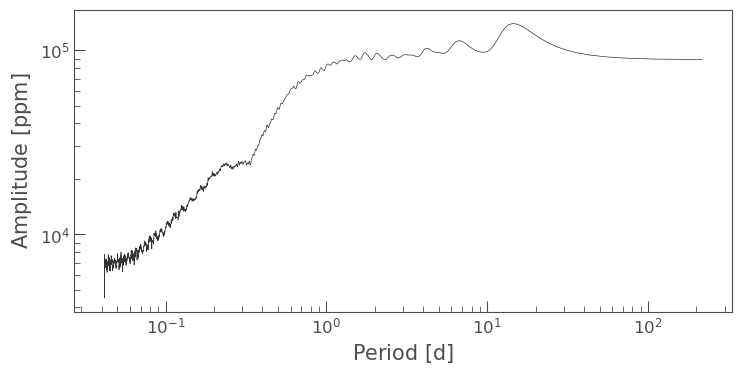

In [54]:
pg2.plot(view='period',scale='log')

Best Period: 14.499796549479166 d


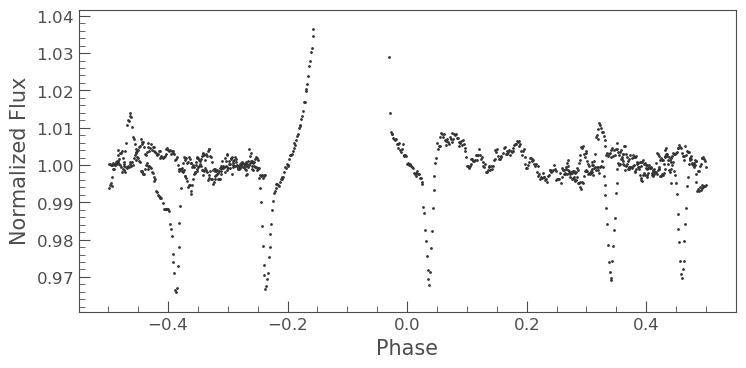

In [55]:
period=pg2.period_at_max_power
print("Best Period: {}".format(period))
lc2.remove_nans().remove_outliers(sigma=4).flatten(window_length=1475).fold(period.value).scatter()

In [56]:
tpf3= TessTargetPixelFile('https://mast.stsci.edu/tesscut/api/v0.1/astrocut?ra=85.98751068&dec=9.27333736&y=4&x=20&units=px&sector=All')

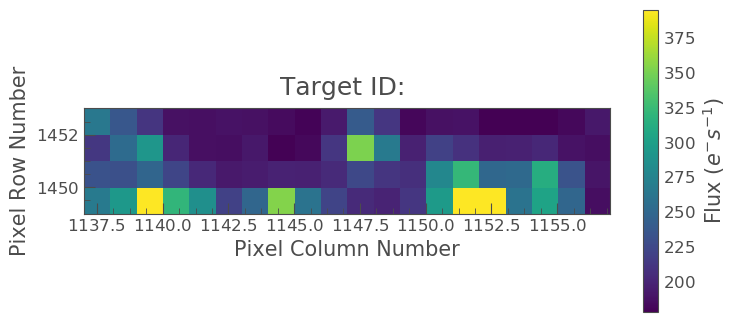

In [57]:
tpf3.plot()

In [58]:
tpf4 = search_targetpixelfile(200363295, sector=6).download()

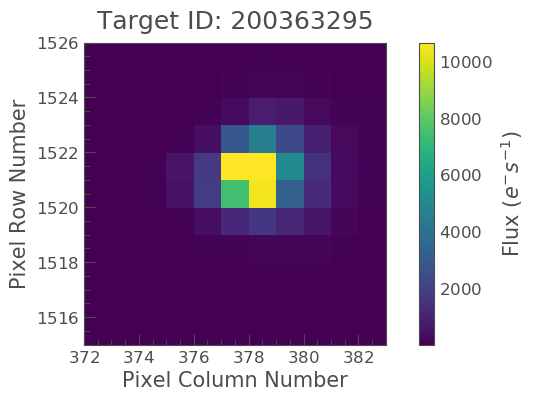

In [59]:
tpf4.plot()

In [60]:
lc4=tpf4.to_lightcurve()


<function matplotlib.pyplot.show(*args, **kw)>

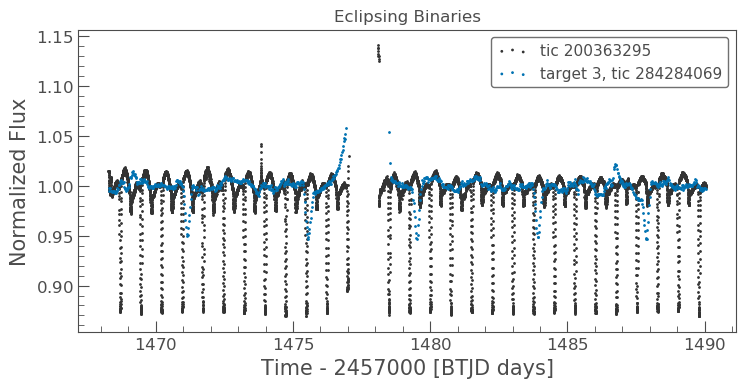

In [61]:
lc4 = lc4.remove_nans().remove_outliers(sigma=5).flatten(window_length=1475)
lc = lc.remove_nans().remove_outliers(sigma=5).flatten(window_length=1475)
ax = lc4.scatter(label='tic 200363295')
lc.scatter(ax=ax, label='target 3, tic 284284069');
plt.title("Eclipsing Binaries")
plt.show